# Diabetes prediction model in pregnant women in India

 **This Notebook contains analysis of diabetes records of pregnant women from India**

In [46]:
# Import libraries
import pandas as pd
import matplotlib
import numpy as np

import matplotlib.pyplot as plt 
matplotlib.style.use('ggplot')
import seaborn as sns 
import sklearn 


In [47]:
#Load data from csv file to pandas dataframe
df = pd.read_csv('diabetes.csv')

In [48]:
# Statistics of different predictors in the problem and total number of data points 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
#Preview of the first few columns of the data frame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
#df metrics
print (len(df))

768


In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/home/nagendra/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


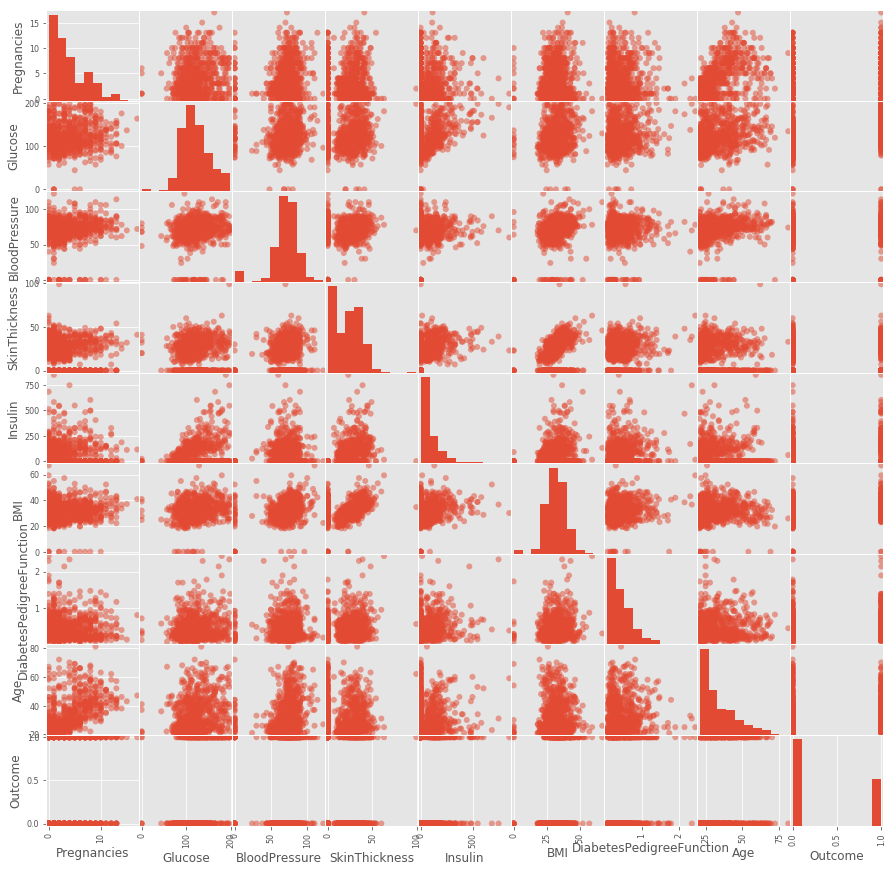

In [52]:
# Pair plots of different predictor pairs. Seaborn gives a better plots in the next cell
mt = pd.scatter_matrix(df, figsize=(15,15), marker='o')

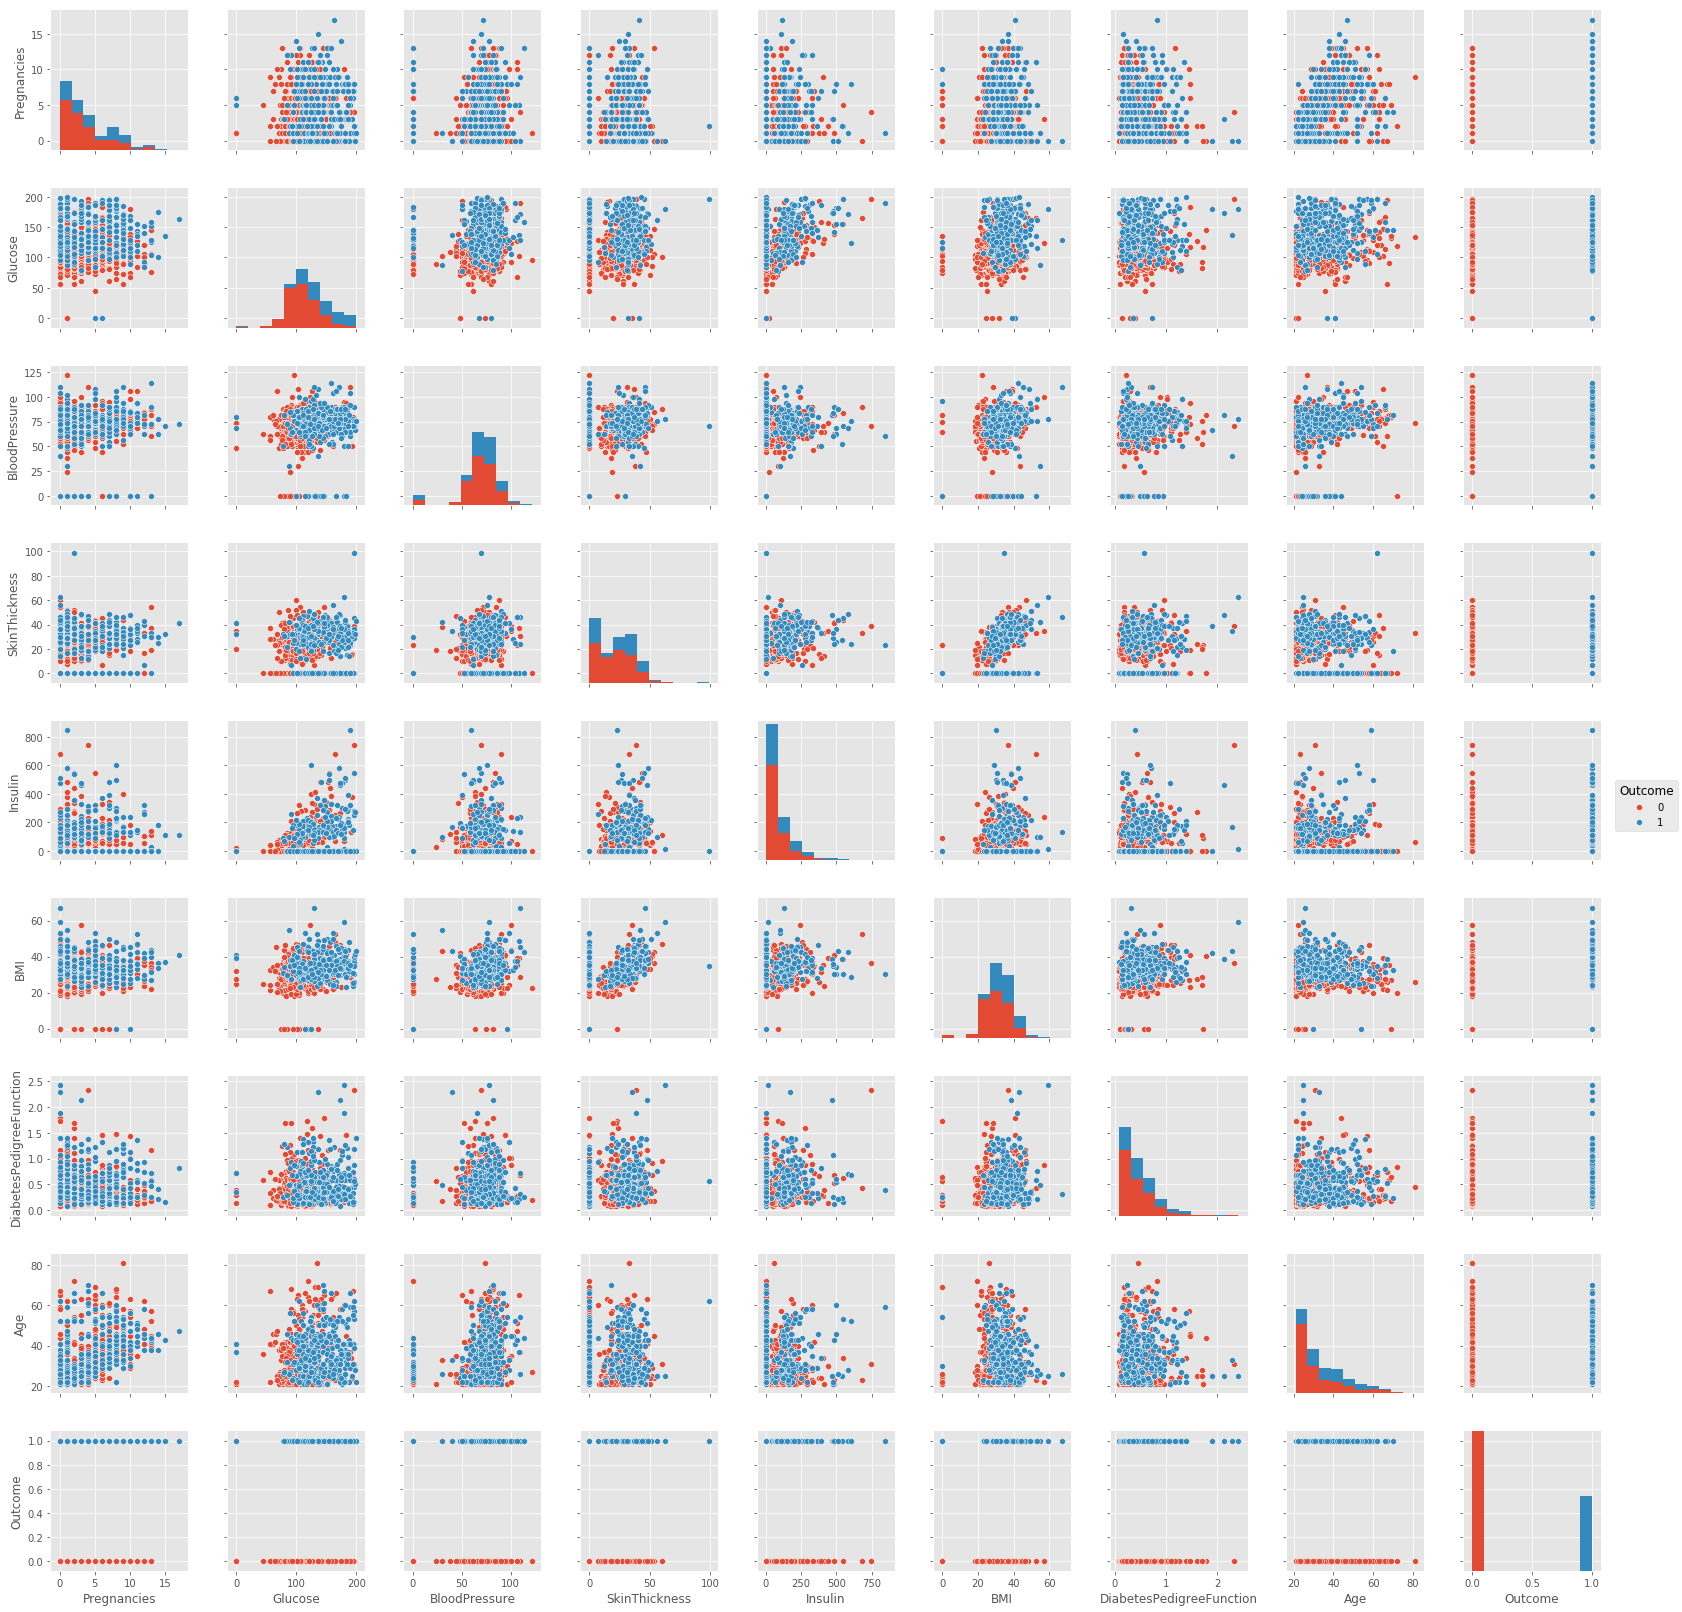

In [53]:
# Pair plots of different pairs of predictors for the two different categories of outcome data
sns.pairplot(data=df,hue='Outcome')

## Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# Building data from data frame to be passed in to scikit-learn model

In [55]:
Y = df.Outcome

In [56]:
X = df.drop('Outcome',axis = 1)

In [57]:
# Split the data into test and training for cross validation purpose
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 60)

###  L2 penalty (Ridge regression) 

In [58]:
# we use L2 penalty to choose important predictors
model_l2 = LogisticRegression()

In [59]:
model_l2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
Y_predict_l2 = model_l2.predict(X_test)

In [61]:
Y_test_array = np.array(Y_test)
print ("Total number of misclassifiction by the model is :", len(np.array(abs(Y_predict_l2 - Y_test))))

Total number of misclassifiction by the model is : 154


In [62]:
conf_mat_l2= confusion_matrix(Y_test,Y_predict_l2)
conf_mat_l2_df = pd.DataFrame(conf_mat_l2, index = ['predicted_negative', 'predicted_positve'], columns = ['True_negative','True_positive'] )
conf_mat_l2_df.head()

,True_negative,True_positive
predicted_negative,91,12
predicted_positve,23,28


### L1 penalty (Lasso regression) 

In [63]:
# we use L1 penalty to choose important predictors
model_l1 = LogisticRegression()

In [64]:
model_l1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
Y_predict_l1 = model_l1.predict(X_test)

In [66]:
Y_test_array = np.array(Y_test)
len(np.array(abs(Y_predict_l1 - Y_test)))

154

In [67]:
conf_mat_l1 = confusion_matrix(Y_test,Y_predict_l1)
conf_mat_l1_df = pd.DataFrame(conf_mat_l1, index = ['predicted_negative', 'predicted_positve'], columns = ['True_negative','True_positive'] )
conf_mat_l1_df.head()

,True_negative,True_positive
predicted_negative,91,12
predicted_positve,23,28


### Discussion

The model fitted with L1 and L2 penalty give essentially the same model and identical confusion matrix